## Challenge Set 3
## Linear Regression and Train/Test Split


### Table of Contents 

Ideally, try these with your own data! (Alternatively, there is the 2013_movies.csv data set.)

[Challenge01](#1) 

[Challenge02](#2) 

[Challenge03](#3) 

[Challenge04](#4) 

[Challenge05](#5) 

---

In [1]:
% pylab inline

Populating the interactive namespace from numpy and matplotlib


In [106]:
import pandas as pd
import statsmodels.formula.api as sm

movies = pd.read_csv('2013_movies.csv', parse_dates={'Date':['ReleaseDate']})
# Adding Our Constants.. 
movies['ones']=1

In [29]:
movies.head()

,Date,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ones
0,2013-11-22,The Hunger Games: Catching Fire,130000000,424668047,Francis Lawrence,PG-13,146,1
1,2013-05-03,Iron Man 3,200000000,409013994,Shane Black,PG-13,129,1
2,2013-11-22,Frozen,150000000,400738009,Chris BuckJennifer Lee,PG,108,1
3,2013-07-03,Despicable Me 2,76000000,368061265,Pierre CoffinChris Renaud,PG,98,1
4,2013-06-14,Man of Steel,225000000,291045518,Zack Snyder,PG-13,143,1


### <a id='1'></a> Challenge 1

Build a linear model that uses only a constant term (a column of ones) to predict a continuous outcome (like domestic total gross). How can you interpret the results of this model? What does it predict? Make a plot of predictions against actual outcome. Make a histogram of residuals. How are the residuals distributed?

In [35]:
# Part One ~ Use only constants for prediction
def train_model(dataframe, explanatory_vars, outcome_var):
    X = dataframe[explanatory_vars]
    Y = dataframe[outcome_var]
    model = smf.OLS(Y, X).fit()
    return model


lin_model = train_model(movies, ['ones'], 'DomesticTotalGross')

In [7]:
print lin_model

In [39]:

# Plotting predictions for linear model

def plot_predictions(X, Y, model,new_series):
    plt.plot(model.predict(X),Y,'go')
    # plot actual
    plt.xlabel('Predicted Outcome Var')
    plt.ylabel('Actual Outcome Var')
    new_series=model.predict(X)
    return new_series

In [11]:
movies['predict']=lin_model.predict(movies.ones)
movies.head()

,Date,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ones,predict
0,2013-11-22,The Hunger Games: Catching Fire,130000000,424668047,Francis Lawrence,PG-13,146,1,1.005969e+08
1,2013-05-03,Iron Man 3,200000000,409013994,Shane Black,PG-13,129,1,1.005969e+08
2,2013-11-22,Frozen,150000000,400738009,Chris BuckJennifer Lee,PG,108,1,1.005969e+08
3,2013-07-03,Despicable Me 2,76000000,368061265,Pierre CoffinChris Renaud,PG,98,1,1.005969e+08
4,2013-06-14,Man of Steel,225000000,291045518,Zack Snyder,PG-13,143,1,1.005969e+08


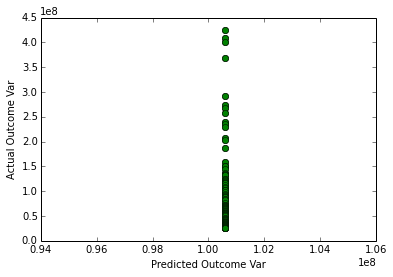

In [12]:
plot_predictions(movies.ones, movies.DomesticTotalGross,lin_model,movies['predict'])

#create new series for predictions
movies['predict']=plot_predictions(movies.ones, movies.DomesticTotalGross,lin_model,movies['predict'])

In [67]:
# We can develop this another way.. 

def ols_regression(y_response):
    """solution for solving a regression.
    x_input: an input narray (X)
    y_response: a 1d array of expected outputs (y)
    X and y must have equal lengths, but x can be multiple dimensions
    should return back a 1d array of 1 intercept + all coefficients
    """
    intercept_matrix = np.ones(len(y_response))
    x_var = np.array([intercept_matrix]).T
    x_inv = x_var.T
    a = np.linalg.inv(x_inv.dot(x_var))
    b = x_inv.dot(y_response)
    return a.dot(b)


y_prediction= ols_regression(movies.DomesticTotalGross)
print y_intercept

[  1.00596875e+08]


'How can you interpret the results of this model?, ~ What does it predict?'

- This result is just predicting the y intercept value.  We can see above, that when we only input a vector of ones for the X_var: our returned vector has a length of one (y intercept)

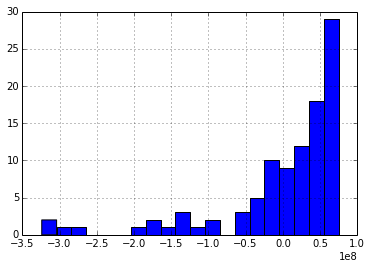

In [54]:
def residual(Predicted,X,model):
    Observed=model.predict(X)
    res=Observed-Predicted
    return res

movies['residuals']=residual(movies.DomesticTotalGross, movies.ones,lin_model)

movies['residuals'].hist(bins=20)



'How are the residuals distributed'?

- the distribution has a 'negative' skew, and is left-tailed.  This seems to illustrate an 'Unbalanced' X-Axis  (Residuals are not evenly distributed).. 

### <a id='2'></a> Challenge 2

 - Repeat the process of challenge one, but also add one continuous (numeric) predictor variable. 
Also add plots of model prediction against your feature variable and residuals against feature variable. 
How can you interpret what's happening in the model?

In [48]:
# Fill na for some missing data.. 
 
movies.Budget=movies.Budget.fillna(movies.Budget.mean())
movies.describe()


,Budget,DomesticTotalGross,Runtime,ones
count,1.000000e+02,1.000000e+02,100.000000,100
mean,7.474719e+07,1.005969e+08,112.260000,1
std,5.601881e+07,8.739641e+07,18.190696,0
min,2.500000e+06,2.556825e+07,75.000000,1
25%,3.000000e+07,4.270413e+07,98.000000,1
50%,6.550000e+07,6.954237e+07,112.000000,1
75%,1.035000e+08,1.204759e+08,123.000000,1
max,2.250000e+08,4.246680e+08,180.000000,1


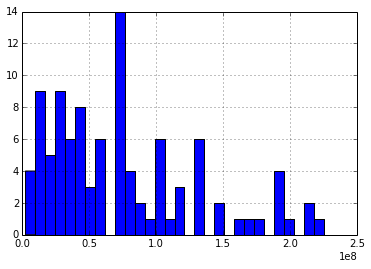

In [65]:
movies.Budget.hist(bins=30)

In [51]:
# Get 'train_model' function from above

lin_model2=train_model(movies,['Budget'], 'DomesticTotalGross')

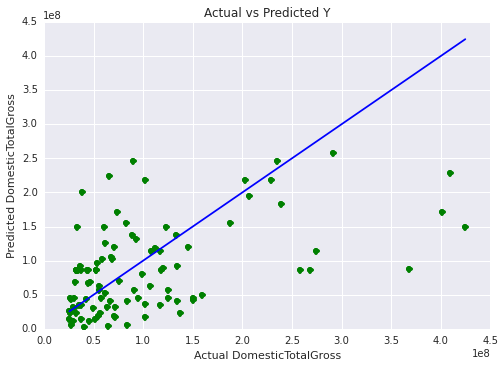

In [86]:
# Refine plot_predictions function to accomodate 2 variables.. 

def plot_predictions(dataframe, explanatory_vars, outcome_var, model):
    X = dataframe[explanatory_vars]
    # plot the predictions 
    plt.plot(dataframe[outcome_var], model.predict(X), 'go')
    # plot the 1:1 actual outcome line
    plt.plot(dataframe[outcome_var], dataframe[outcome_var], 'b')
    # axis labels
    plt.xlabel('Actual %s' % outcome_var)
    plt.ylabel('Predicted %s' % outcome_var)
    plt.title("Actual vs Predicted Y")

plot_predictions(movies, ['Budget'], 'DomesticTotalGross', lin_model2)

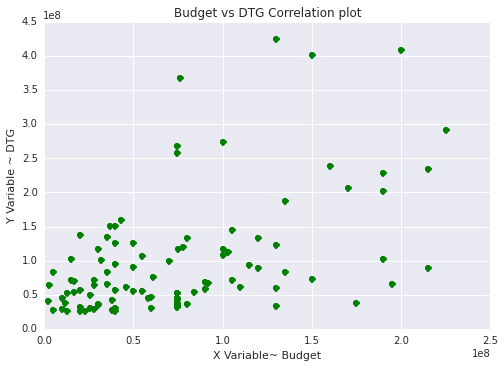

In [91]:
plt.plot(movies.Budget, movies.DomesticTotalGross, 'go')
plt.xlabel('X Variable~ Budget')
plt.ylabel('Y Variable ~ DTG')
plt.title('Budget vs DTG Correlation plot')

In [ ]:
# Q : How can you interpret what's happening in the model? 

# A: We can use observed, predicted & residual values to asses what is going on with the model.

# We can see from above the "Actual vs Predicted Plot, that this model is not terribly accurate. 

# We can also see from the following Residual histogram that there is a left-tail distribution.
# We can assume that this models simply needs more varialbles!

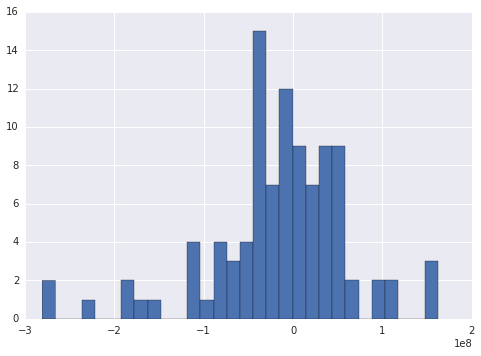

In [90]:
# Get Residual (using residual function above) 
movies['residual2s']=residual(movies.DomesticTotalGross, movies.Budget,lin_model2)
#plot Histogram of Residuals.. 
movies['residual2s'].hist(bins=30)

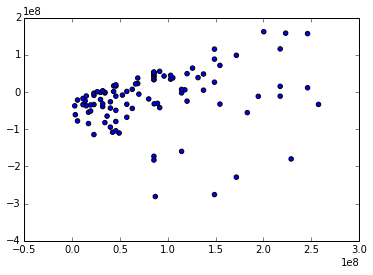

In [64]:
plt.scatter(lin_model2.predict(movies.Budget),movies.residual2s)

### <a id='3'></a> Challenge 3

Repeat the process of challenge 1, but add a categorical feature (like genre). 
You'll have to convert a column of text into a number of numerical columns ("dummy variables").
How can you interpret what's happening in the model?

In [96]:
# Convert Director via get dummies ! 

these=pd.get_dummies(movies.Rating)
movies=movies.join(these)
movies.head(1)

,Date,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ones,residuals,residual2s,Log_Budget,G,PG,PG-13,R
0,2013-11-22,The Hunger Games: Catching Fire,130000000,424668047,Francis Lawrence,PG-13,146,1,-3.240712e+08,-2.757805e+08,18.683045,0,0,1,0


In [97]:
# Get 'train_model' function from above

lin_model3=train_model(movies,['G','PG','PG-13','R'], 'DomesticTotalGross')

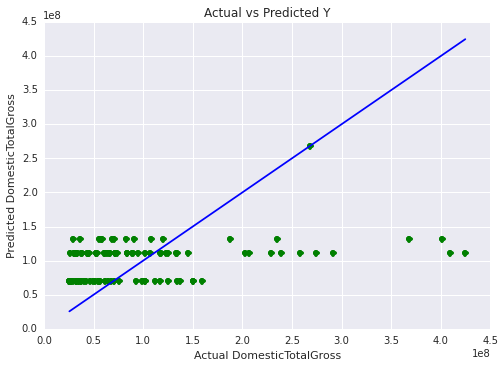

In [98]:
# Get 'plot_predictions' function from above

plot_predictions(movies,['G','PG','PG-13','R'], 'DomesticTotalGross', lin_model3)

In [ ]:
# Q: 'How can you tell what is happening with your model ? 
#A: Again, we can use our Observed, Predicted and Residual data to observe what is happening with our models. .
# We can tell from the above plot, that this model is NOT accurate.  We can assume that binary explanatory variables are no
# ideal for linear regression

### <a id='4'></a> Challenge 4

Enhance your model further by adding more features and/or transforming existing features. 
Think about how you build the model matrix and how to interpret what the model is doing.


/Users/julialintern/anaconda/lib/python2.7/site-packages/matplotlib/axes.py:2536: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=1.0, right=1.0
  + 'left=%s, right=%s') % (left, right))
/Users/julialintern/anaconda/lib/python2.7/site-packages/matplotlib/axes.py:2760: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=1.0, top=1.0
  + 'bottom=%s, top=%s') % (bottom, top))


array([[<matplotlib.axes.AxesSubplot object at 0x10daf2e50>,
        <matplotlib.axes.AxesSubplot object at 0x10e42ce10>]], dtype=object)

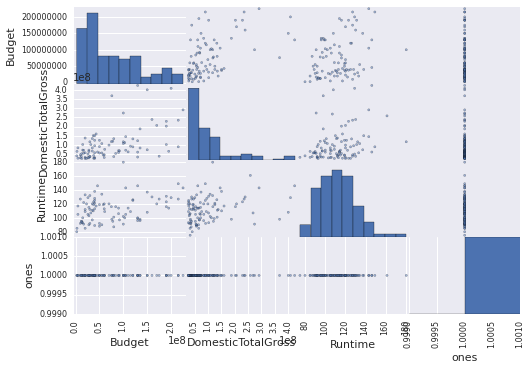

In [108]:
# Lets take a look at our entire model, and try to determine some of our stronger features
pd.tools.plotting.scatter_matrix(movies)

In [115]:
movies.Budget=movies.Budget.fillna(movies.Budget.mean())

In [119]:
# Enhance the model 
## STEP 1: I will log transform any skewed features

movies['log_Budget']=np.log(movies.Budget)
movies['log_DTG']=np.log(movies.DomesticTotalGross)
movies['log_Run']=np.log(movies.Runtime)

In [117]:
## STEP 2:  I will add all original numeric features into my linear model, and then compare to the model with
# log_linear features


lin_model4=train_model(movies,['Budget','Runtime'], 'DomesticTotalGross')
print lin_model4.summary()

                            OLS Regression Results                            
Dep. Variable:     DomesticTotalGross   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     107.6
Date:                Thu, 03 Sep 2015   Prob (F-statistic):           1.86e-25
Time:                        20:17:21   Log-Likelihood:                -1954.4
No. Observations:                 100   AIC:                             3913.
Df Residuals:                      98   BIC:                             3918.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Budget         0.7217      0.142      5.096      0.0

In [ ]:
# We can see the R^2 value above is only 0.687, we will see if this can be improved upon.

In [122]:
lin_model5=train_model(movies,['log_Run','log_Budget'], 'log_DTG')
print lin_model5.summary()

                            OLS Regression Results                            
Dep. Variable:                log_DTG   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 3.418e+04
Date:                Thu, 03 Sep 2015   Prob (F-statistic):          4.28e-140
Time:                        20:22:02   Log-Likelihood:                -104.36
No. Observations:                 100   AIC:                             212.7
Df Residuals:                      98   BIC:                             217.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
log_Run        2.3748      0.280      8.470      0.0

In [ ]:
## We can see that the above with log transformed feat has a much improved R^2 value.


### <a id='5'></a> Challenge 5

Fitting and checking predictions on the exact same data set can be misleading. 
Divide your data into two sets: a training and a test set (roughly 75% training, 25% test is a fine split). 
Fit a model on the training set, check the predictions (by plotting versus actual values) in the test set.

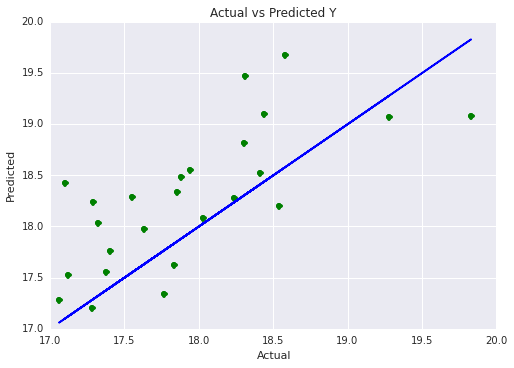

In [138]:
from sklearn import cross_validation
from sklearn.cross_validation import train_test_split

X=movies[['log_Run','log_Budget']]
Y=movies['log_DTG']
xtrain, xtest, ytrain, ytest=cross_validation.train_test_split(X,Y, test_size=0.25, random_state=1234)

model = smf.OLS(ytrain, xtrain).fit()

predictions=model.predict(xtest)

plt.plot(ytest, predictions,'go')

# plot the 1:1 actual outcome line
plt.plot(ytest, ytest, 'b')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title("Actual vs Predicted Y")